In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thanhhoa-data/testset_36.csv
/kaggle/input/thanhhoa-data/trainset_36.csv
/kaggle/input/final-data36/train.csv
/kaggle/input/final-data36/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/final-data36/train.csv")
test_df = pd.read_csv("/kaggle/input/final-data36/test.csv")

In [3]:
train_df

,long,lat,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,label
0,105.789453,19.409841,1550.0,1351.5,1223.5,1273.0,1231.0,1419.0,1586.5,1478.5,1742.0,299.0,9.5,2191.5,2011.5,residentialland
1,105.785023,19.740696,1539.0,1458.0,1337.5,1193.0,1306.5,1831.0,2111.5,2202.5,2322.0,387.5,10.5,2361.5,2005.5,residentialland
2,106.021096,19.982862,1617.0,1346.0,1221.0,1021.0,1108.0,1493.0,1709.0,1528.0,1751.0,264.0,9.0,825.0,398.0,aquaculture
3,105.771186,19.321312,1708.5,1474.0,1374.5,1115.0,1060.5,1119.0,1228.5,1046.5,1150.0,141.5,7.5,766.0,539.5,open_water
4,105.802570,19.817704,1856.5,1593.0,1549.5,1436.0,1618.5,2083.0,2303.5,2226.0,2489.0,372.5,11.0,2076.0,1443.5,residentialland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,105.710046,19.891983,1464.0,1273.0,1158.0,871.5,1168.0,2165.0,2728.5,2464.0,2864.0,340.0,12.0,1341.0,596.0,ricepaddies
11396,105.077327,20.490431,1103.5,783.5,604.0,370.0,648.5,1537.0,1862.5,1547.5,2080.0,576.5,9.0,965.0,386.5,forest
11397,105.821635,19.618941,1602.5,1226.5,1092.0,1182.5,1337.0,1740.0,1970.5,1661.5,2125.0,335.0,11.5,2318.5,2170.5,residentialland
11398,106.024398,19.991775,1599.0,1338.0,1249.0,1117.0,1145.0,1224.0,1401.0,1391.0,1365.0,199.0,9.0,807.0,442.0,aquaculture


In [4]:
# train_df = train_df[train_df['label'] != 'shrubland']
# test_df = test_df[test_df['label'] != 'shrubland']

In [5]:
from sklearn.preprocessing import LabelEncoder
def preprocess_data(df):
    # Drop long, lat
    df.drop(columns=["long", "lat"], inplace=True) 
    
    # Encode cột label 
    le = LabelEncoder()
    df['label'] = le.fit_transform(df['label'])
    print(f"Label encoding for {'label'}:")
    for label, num in zip(le.classes_, range(len(le.classes_))):
        print(f"{label} -> {num}")

In [6]:
preprocess_data(train_df), preprocess_data(test_df)

Label encoding for label:
aquaculture -> 0
barrenland -> 1
cropland -> 2
forest -> 3
grassland -> 4
open_water -> 5
residentialland -> 6
ricepaddies -> 7
shrubland -> 8
wetlands -> 9
Label encoding for label:
aquaculture -> 0
barrenland -> 1
cropland -> 2
forest -> 3
grassland -> 4
open_water -> 5
residentialland -> 6
ricepaddies -> 7
shrubland -> 8
wetlands -> 9


(None, None)

In [7]:
train_df

,B1,B2,B3,B4,B5,B6,B7,B8,B8A,B9,B10,B11,B12,label
0,1550.0,1351.5,1223.5,1273.0,1231.0,1419.0,1586.5,1478.5,1742.0,299.0,9.5,2191.5,2011.5,6
1,1539.0,1458.0,1337.5,1193.0,1306.5,1831.0,2111.5,2202.5,2322.0,387.5,10.5,2361.5,2005.5,6
2,1617.0,1346.0,1221.0,1021.0,1108.0,1493.0,1709.0,1528.0,1751.0,264.0,9.0,825.0,398.0,0
3,1708.5,1474.0,1374.5,1115.0,1060.5,1119.0,1228.5,1046.5,1150.0,141.5,7.5,766.0,539.5,5
4,1856.5,1593.0,1549.5,1436.0,1618.5,2083.0,2303.5,2226.0,2489.0,372.5,11.0,2076.0,1443.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,1464.0,1273.0,1158.0,871.5,1168.0,2165.0,2728.5,2464.0,2864.0,340.0,12.0,1341.0,596.0,7
11396,1103.5,783.5,604.0,370.0,648.5,1537.0,1862.5,1547.5,2080.0,576.5,9.0,965.0,386.5,3
11397,1602.5,1226.5,1092.0,1182.5,1337.0,1740.0,1970.5,1661.5,2125.0,335.0,11.5,2318.5,2170.5,6
11398,1599.0,1338.0,1249.0,1117.0,1145.0,1224.0,1401.0,1391.0,1365.0,199.0,9.0,807.0,442.0,0


In [8]:
# def add_features(df):
#     df['NDVI'] = (df['B8'] - df['B4']) / (df['B8'] + df['B4'])
#     df['NDWI'] = (df['B3'] - df['B8']) / (df['B3'] + df['B8'])
#     df['NDMI'] = (df['B8A'] - df['B11']) / (df['B8A'] + df['B11'])
#     df['NDBI'] = (df['B11'] - df['B8']) / (df['B11'] + df['B8'])
#     df['BSI'] = ((df['B12'] + df['B8']) - (df['B4'] + df['B3'])) / ((df['B12'] + df['B8']) + (df['B4'] + df['B3']))
#     # df['EVI'] = 2.5 * (df['B8'] - df['B4']) / (df['B8'] + 6 * df['B4'] - 7.5 * df['B2'] + 1) # Trường này có - ở mẫu nên khả năng thành NaN hoặc inf là tương đối cao
#     L = 0.5
#     df['SAVI'] = ((df['B8'] - df['B4']) * (1 + L)) / (df['B8'] + df['B4'] + L) # (Soil Adjusted Vegetation Index) – NDVI hiệu chỉnh ảnh hưởng của đất
#     return df

# train_df = add_features(train_df.copy())
# test_df = add_features(test_df.copy())
# train_df

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

def apply_scale_pl(X_train, X_test):
    scale_pl = Pipeline([
        ("pt", PowerTransformer(method="yeo-johnson", standardize=False)),
        ("scaler", StandardScaler()),
    ])
    X_train = scale_pl.fit_transform(X_train)
    X_test = scale_pl.transform(X_test)
    return X_train, X_test

class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.pt = PowerTransformer(method="yeo-johnson", standardize=False)
        self.scaler = StandardScaler()
        
    def fit(self, X, y=None):
        self.pt.fit(X)
        transformed_X = self.pt.transform(X)
        self.scaler.fit(transformed_X)
        return self
        
    def transform(self, X):
        transformed_X = self.pt.transform(X)
        return self.scaler.transform(transformed_X)

# Model

In [10]:
from sklearn.model_selection import train_test_split
def gen_train_test():
    X_train = train_df.drop(columns=['label'])
    y_train = train_df['label']
    X_test = test_df.drop(columns=['label'])
    y_test = test_df['label']
    return X_train, X_test, y_train, y_test

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score, f1_score,
    classification_report
)
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn import svm
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as xgb

def display_confusion_matrix(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

def display_result(y_test,y_pred, model):
    print("📊 Evaluation Metrics:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall   :", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score :", f1_score(y_test, y_pred, average='weighted'))
    
    print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))
    display_confusion_matrix(y_test, y_pred, model)

In [12]:
X_train, X_test, y_train, y_test = gen_train_test()

# Stacking

In [13]:
class StackingEnsemble:
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        self.base_models_fitted = []
        self.classes_ = None
        
    def fit(self, X, y):
        # Bước 3: Tạo meta-features thông qua cross-validation
        self.classes_ = np.unique(y)
        meta_features = np.zeros((X.shape[0], len(self.base_models)))
        
        # Sử dụng KFold để tạo dự đoán out-of-fold
        kf = KFold(n_splits=self.n_folds, shuffle=True, random_state=42)
        
        # Với mỗi base model, tạo dự đoán OOF để tạo input cho meta-model
        for i, model in enumerate(self.base_models):
            # Nếu model là SVC, sử dụng predict_proba nếu có
            if isinstance(model, SVC) and not hasattr(model, 'predict_proba'):
                model.probability = True  # Đảm bảo SVC có predict_proba
                
            # Tạo dự đoán OOF cho model này
            oof_predictions = np.zeros(X.shape[0])
            for train_idx, val_idx in kf.split(X):
                X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
                y_train_fold = y.iloc[train_idx]
                
                # Train model
                model.fit(X_train_fold, y_train_fold)
                
                # Dự đoán
                oof_predictions[val_idx] = model.predict(X_val_fold)
                
            # Lưu dự đoán OOF như một meta-feature
            meta_features[:, i] = oof_predictions
        
        # Bước 4: Train meta-model trên meta-features
        self.meta_model.fit(meta_features, y)
        
        # Bước 5: Train lại tất cả base models trên toàn bộ dữ liệu
        self.base_models_fitted = []
        for model in self.base_models:
            # Clone và train model trên toàn bộ dữ liệu
            fitted_model = model.fit(X, y)
            self.base_models_fitted.append(fitted_model)
            
        return self
    
    def predict(self, X):
        # Bước 6: Dự đoán trên tập test
        # Tạo meta-features từ các base models đã train
        meta_features = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models_fitted):
            meta_features[:, i] = model.predict(X)
            
        # Dùng meta-model để dự đoán kết quả cuối cùng
        return self.meta_model.predict(meta_features)
    
    def predict_proba(self, X):
        # Tạo meta-features từ các base models đã train
        meta_features = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models_fitted):
            meta_features[:, i] = model.predict(X)
            
        # Dùng meta-model để dự đoán kết quả với xác suất
        return self.meta_model.predict_proba(meta_features)

In [14]:
base_models = [
    make_pipeline(CustomScaler(), SVC(kernel='rbf', C=100, gamma = 'auto')),
    RandomForestClassifier(n_estimators=100, random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    xgb.XGBClassifier(
        n_estimators=100,      
        max_depth=4,            
        learning_rate=0.1,   
        use_label_encoder=False,
        eval_metric='logloss' 
    )
]

# Chuẩn bị meta-model (Level 1)
# meta_model = LogisticRegression(max_iter=1000, random_state=42)

meta_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Tạo stacking ensemble
stacking_model = StackingEnsemble(
    base_models=base_models,
    meta_model=meta_model,
    n_folds=5
)

# Huấn luyện mô hình stacking
stacking_model.fit(X_train, y_train)

📊 Evaluation Metrics:
Accuracy : 0.8750877192982456
Precision: 0.8720891125038451
Recall   : 0.8750877192982456
F1 Score : 0.8691835277414242

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.89       240
           1       0.88      0.89      0.88       120
           2       0.77      0.88      0.82       420
           3       0.91      0.93      0.92       430
           4       0.78      0.65      0.71       150
           5       0.92      0.90      0.91       430
           6       0.96      0.96      0.96       440
           7       0.91      0.94      0.93       440
           8       0.69      0.23      0.34        80
           9       0.68      0.61      0.64       100

    accuracy                           0.88      2850
   macro avg       0.84      0.79      0.80      2850
weighted avg       0.87      0.88      0.87      2850



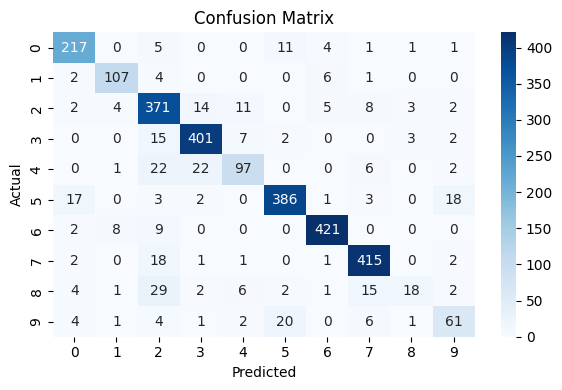

In [15]:
# Dự đoán trên tập test
y_stack_pred = stacking_model.predict(X_test)
display_result(y_test, y_stack_pred, stacking_model)


===== SVM Model Evaluation =====
📊 Evaluation Metrics:
Accuracy : 0.864561403508772
Precision: 0.8578956377660679
Recall   : 0.864561403508772
F1 Score : 0.8564248174291578

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       240
           1       0.82      0.82      0.82       120
           2       0.75      0.88      0.81       420
           3       0.92      0.92      0.92       430
           4       0.77      0.68      0.72       150
           5       0.89      0.91      0.90       430
           6       0.96      0.96      0.96       440
           7       0.89      0.94      0.92       440
           8       0.53      0.12      0.20        80
           9       0.70      0.54      0.61       100

    accuracy                           0.86      2850
   macro avg       0.81      0.76      0.77      2850
weighted avg       0.86      0.86      0.86      2850



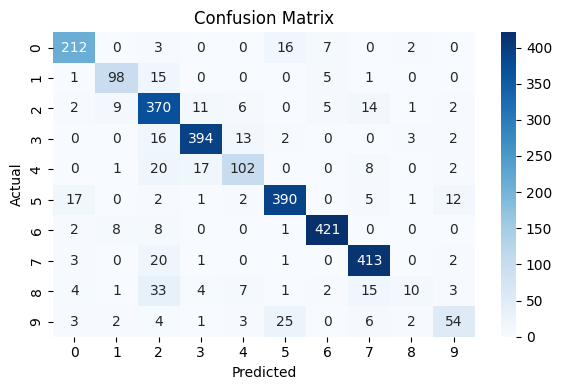


===== Random Forest Model Evaluation =====
📊 Evaluation Metrics:
Accuracy : 0.8691228070175439
Precision: 0.8677218197567964
Recall   : 0.8691228070175439
F1 Score : 0.861283107084634

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       240
           1       0.86      0.89      0.87       120
           2       0.76      0.90      0.82       420
           3       0.90      0.93      0.91       430
           4       0.80      0.63      0.71       150
           5       0.90      0.90      0.90       430
           6       0.95      0.95      0.95       440
           7       0.89      0.95      0.92       440
           8       0.76      0.20      0.32        80
           9       0.77      0.51      0.61       100

    accuracy                           0.87      2850
   macro avg       0.85      0.77      0.79      2850
weighted avg       0.87      0.87      0.86      2850



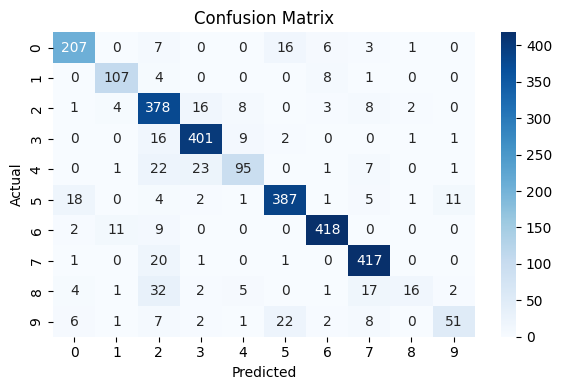


===== KNN Model Evaluation =====
📊 Evaluation Metrics:
Accuracy : 0.8235087719298245
Precision: 0.8188544631874307
Recall   : 0.8235087719298245
F1 Score : 0.8129149123947563

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       240
           1       0.71      0.86      0.77       120
           2       0.70      0.83      0.76       420
           3       0.88      0.89      0.88       430
           4       0.61      0.49      0.55       150
           5       0.92      0.88      0.90       430
           6       0.93      0.91      0.92       440
           7       0.84      0.94      0.89       440
           8       0.50      0.11      0.18        80
           9       0.78      0.36      0.49       100

    accuracy                           0.82      2850
   macro avg       0.77      0.71      0.72      2850
weighted avg       0.82      0.82      0.81      2850



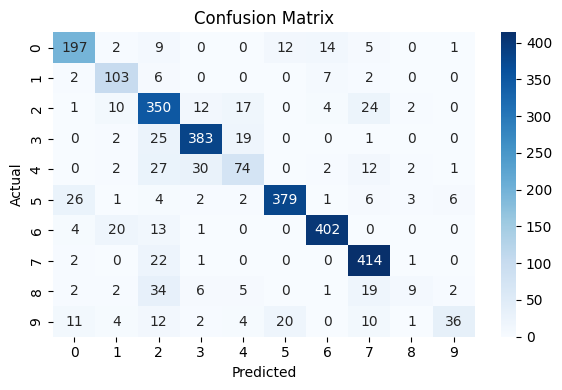


===== XGBoost Model Evaluation =====
📊 Evaluation Metrics:
Accuracy : 0.8512280701754386
Precision: 0.846480775105926
Recall   : 0.8512280701754386
F1 Score : 0.8408105013016286

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       240
           1       0.81      0.81      0.81       120
           2       0.73      0.86      0.79       420
           3       0.89      0.94      0.92       430
           4       0.75      0.57      0.65       150
           5       0.89      0.90      0.90       430
           6       0.93      0.93      0.93       440
           7       0.87      0.95      0.91       440
           8       0.64      0.11      0.19        80
           9       0.75      0.48      0.59       100

    accuracy                           0.85      2850
   macro avg       0.81      0.74      0.75      2850
weighted avg       0.85      0.85      0.84      2850



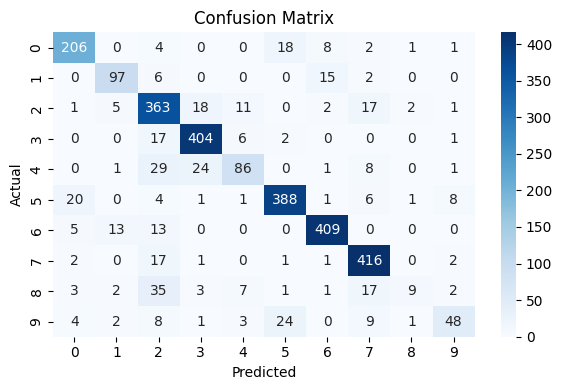

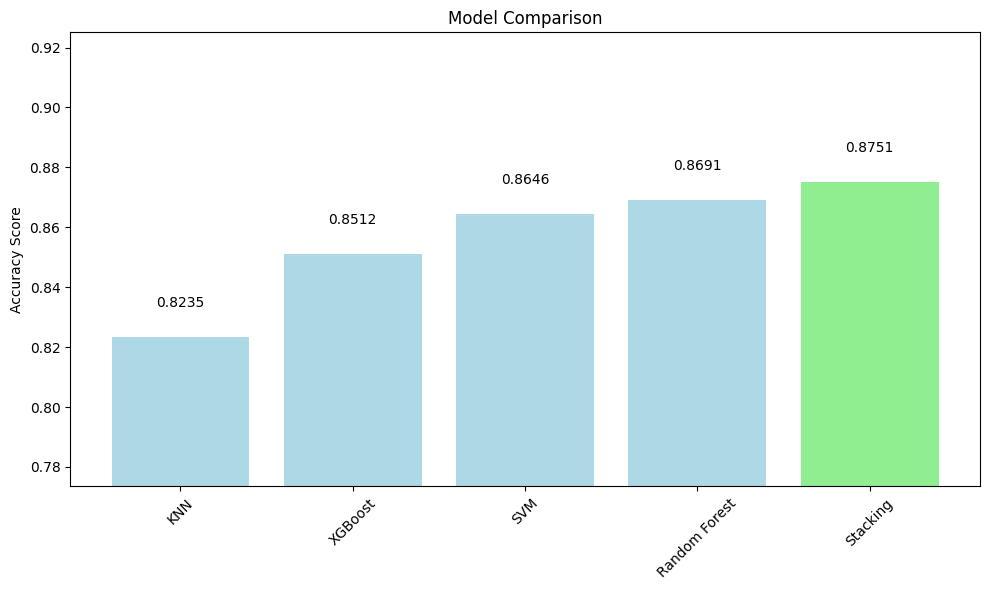

In [16]:
def evaluate_base_models():
    results = {}
    
    # Đánh giá SVM
    print("\n===== SVM Model Evaluation =====")
    svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=100, gamma = 'auto'))
    svm_model.fit(X_train, y_train)
    y_svm_pred = svm_model.predict(X_test)
    display_result(y_test, y_svm_pred, svm_model)
    svm_acc = accuracy_score(y_test, y_svm_pred)
    results['SVM'] = svm_acc
    
    # Đánh giá Random Forest
    print("\n===== Random Forest Model Evaluation =====")
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_rf_pred = rf_model.predict(X_test)
    display_result(y_test, y_rf_pred, rf_model)
    rf_acc = accuracy_score(y_test, y_rf_pred)
    results['Random Forest'] = rf_acc
    
    # Đánh giá KNN
    print("\n===== KNN Model Evaluation =====")
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_knn_pred = knn_model.predict(X_test)
    display_result(y_test, y_knn_pred, knn_model)
    knn_acc = accuracy_score(y_test, y_knn_pred)
    results['KNN'] = knn_acc
    
    # Đánh giá XGBoost
    print("\n===== XGBoost Model Evaluation =====")
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,      
        max_depth=4,            
        learning_rate=0.1,   
        use_label_encoder=False,
        eval_metric='logloss' 
    )
    xgb_model.fit(X_train, y_train)
    y_xgb_pred = xgb_model.predict(X_test)
    display_result(y_test, y_xgb_pred, xgb_model)
    xgb_acc = accuracy_score(y_test, y_xgb_pred)
    results['XGBoost'] = xgb_acc
    
    # Đánh giá Stacking Model (đã được đánh giá trước đó)
    stack_acc = accuracy_score(y_test, y_stack_pred)
    results['Stacking'] = stack_acc
    
    return results

# Thực hiện đánh giá
model_results = evaluate_base_models()

# %% [code]
# Visualize kết quả so sánh
plt.figure(figsize=(10, 6))
models = list(model_results.keys())
accuracies = list(model_results.values())

# Sắp xếp kết quả theo độ chính xác
sorted_indices = np.argsort(accuracies)
models = [models[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]

bar_colors = ['lightblue' for _ in range(len(models))]
bar_colors[-1] = 'lightgreen'  # Highlight stacking model

plt.bar(models, accuracies, color=bar_colors)
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)
plt.xticks(rotation=45)

# Add values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()

In [17]:
best_params_svm = {'C': 130.4091206183061, 'gamma': 'auto', 'kernel': 'rbf'}
best_params_rf = {'n_estimators': 204, 'max_depth': 17, 'min_samples_split': 16, 'min_samples_leaf': 1, 'max_features': None}
best_params_xgb = {'n_estimators': 237, 'max_depth': 13, 'learning_rate': 0.2543265814413219, 'subsample': 0.7300567033535538, 'colsample_bytree': 0.937694348620541, 'gamma': 0.0016968748086772928, 'min_child_weight': 1}

In [18]:
# import optuna
# def objective_stacking(trial):
#     # Define hyperparameter search space for meta-model
#     learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2, log=True)
#     max_depth = trial.suggest_int('max_depth', 2, 7)
#     n_estimators = trial.suggest_int('n_estimators', 50, 200)
#     subsample = trial.suggest_float('subsample', 0.6, 1.0)
#     colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)
    
#     # Use optimized base models
#     X_train, X_test, y_train, y_test = gen_train_test()
    
#     base_models = [
#         make_pipeline(StandardScaler(), svm.SVC(**best_params_svm)),
#         RandomForestClassifier(**best_params_rf, random_state=42),
#         KNeighborsClassifier(n_neighbors=5),  # Could also optimize this
#         xgb.XGBClassifier(
#             use_label_encoder=False,
#             eval_metric='logloss',
#             random_state=42,
#             **best_params_xgb
#         )
#     ]
    
#     # Create meta-model with trial parameters
#     meta_model = xgb.XGBClassifier(
#         learning_rate=learning_rate,
#         max_depth=max_depth,
#         n_estimators=n_estimators,
#         subsample=subsample,
#         colsample_bytree=colsample_bytree,
#         use_label_encoder=False,
#         eval_metric='logloss',
#         random_state=42
#     )
    
#     # Create and evaluate stacking model
#     stacking_model = StackingEnsemble(
#         base_models=base_models,
#         meta_model=meta_model,
#         n_folds=5
#     )
    
#     # Since StackingEnsemble already uses cross-validation internally,
#     # we'll fit and evaluate directly
#     stacking_model.fit(X_train, y_train)
#     y_pred = stacking_model.predict(X_test)
#     score = accuracy_score(y_test, y_pred)
    
#     return score

# # Create study and optimize
# print("Optimizing Stacking Ensemble...")
# study_stacking = optuna.create_study(direction='maximize')
# study_stacking.optimize(objective_stacking, n_trials=30)

# # Get best parameters and evaluate
# best_params_stacking = study_stacking.best_params
# print(f"Best Stacking Meta-Model Parameters: {best_params_stacking}")

In [19]:
best_params_stacking = {'learning_rate': 0.050489121200313285, 'max_depth': 5, 'n_estimators': 193, 'subsample': 0.6866600589184799, 'colsample_bytree': 0.6022434689727867}

Stacking Ensemble Results with Optimized Parameters:
📊 Evaluation Metrics:
Accuracy : 0.8803508771929824
Precision: 0.8741651546932601
Recall   : 0.8803508771929824
F1 Score : 0.8737623275082448

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       240
           1       0.91      0.92      0.91       120
           2       0.80      0.90      0.85       420
           3       0.92      0.93      0.92       430
           4       0.79      0.68      0.73       150
           5       0.91      0.90      0.90       430
           6       0.96      0.96      0.96       440
           7       0.90      0.96      0.93       440
           8       0.57      0.20      0.30        80
           9       0.68      0.57      0.62       100

    accuracy                           0.88      2850
   macro avg       0.83      0.79      0.80      2850
weighted avg       0.87      0.88      0.87      2850



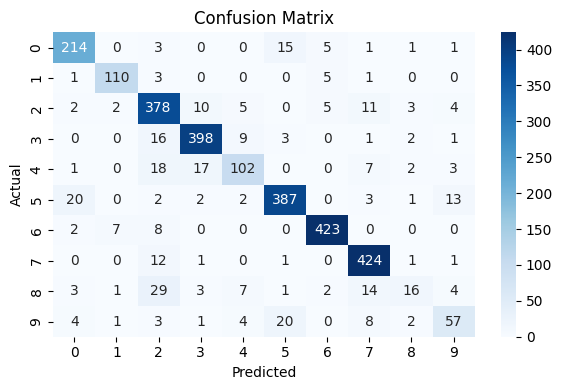

In [20]:
# Apply best parameters
X_train, X_test, y_train, y_test = gen_train_test()

# Base models with optimized parameters
base_models = [
    make_pipeline(StandardScaler(), svm.SVC(**best_params_svm)),
    RandomForestClassifier(**best_params_rf, random_state=42),
    KNeighborsClassifier(n_neighbors=5),
    xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **best_params_xgb
    )
]

# Meta-model with optimized parameters
meta_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    **best_params_stacking
)

# Create stacking ensemble with optimized parameters
stacking_model = StackingEnsemble(
    base_models=base_models,
    meta_model=meta_model,
    n_folds=5
)

# Train and evaluate
stacking_model.fit(X_train, y_train)
y_stack_pred = stacking_model.predict(X_test)
print("Stacking Ensemble Results with Optimized Parameters:")
display_result(y_test, y_stack_pred, stacking_model)


===== SVM Model Evaluation =====
📊 Evaluation Metrics:
Accuracy : 0.8666666666666667
Precision: 0.8624110781442712
Recall   : 0.8666666666666667
F1 Score : 0.8596879829087047

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       240
           1       0.80      0.82      0.81       120
           2       0.76      0.89      0.82       420
           3       0.92      0.92      0.92       430
           4       0.77      0.69      0.73       150
           5       0.89      0.91      0.90       430
           6       0.96      0.95      0.95       440
           7       0.90      0.94      0.92       440
           8       0.62      0.16      0.26        80
           9       0.68      0.56      0.62       100

    accuracy                           0.87      2850
   macro avg       0.82      0.77      0.78      2850
weighted avg       0.86      0.87      0.86      2850



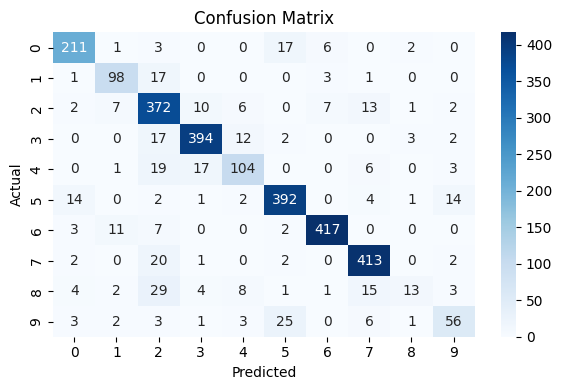


===== Random Forest Model Evaluation =====
📊 Evaluation Metrics:
Accuracy : 0.8487719298245614
Precision: 0.8437362001122056
Recall   : 0.8487719298245614
F1 Score : 0.8412774319720083

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       240
           1       0.83      0.78      0.81       120
           2       0.72      0.86      0.79       420
           3       0.90      0.92      0.91       430
           4       0.75      0.61      0.67       150
           5       0.90      0.90      0.90       430
           6       0.94      0.96      0.95       440
           7       0.89      0.92      0.90       440
           8       0.57      0.16      0.25        80
           9       0.68      0.51      0.58       100

    accuracy                           0.85      2850
   macro avg       0.80      0.75      0.76      2850
weighted avg       0.84      0.85      0.84      2850



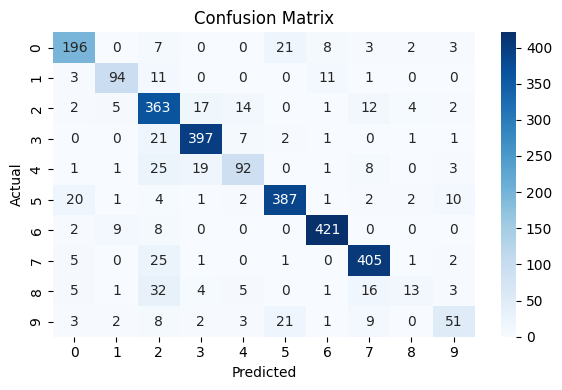


===== KNN Model Evaluation =====
📊 Evaluation Metrics:
Accuracy : 0.8235087719298245
Precision: 0.8188544631874307
Recall   : 0.8235087719298245
F1 Score : 0.8129149123947563

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       240
           1       0.71      0.86      0.77       120
           2       0.70      0.83      0.76       420
           3       0.88      0.89      0.88       430
           4       0.61      0.49      0.55       150
           5       0.92      0.88      0.90       430
           6       0.93      0.91      0.92       440
           7       0.84      0.94      0.89       440
           8       0.50      0.11      0.18        80
           9       0.78      0.36      0.49       100

    accuracy                           0.82      2850
   macro avg       0.77      0.71      0.72      2850
weighted avg       0.82      0.82      0.81      2850



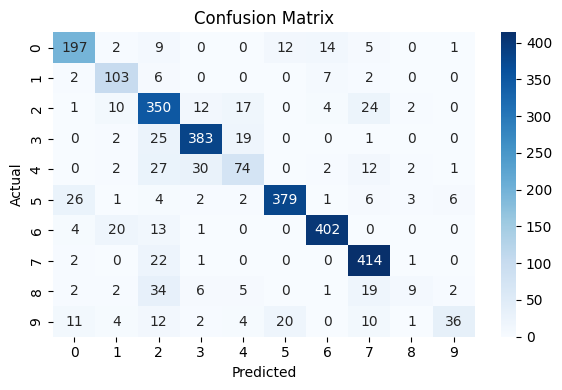


===== XGBoost Model Evaluation =====
📊 Evaluation Metrics:
Accuracy : 0.8828070175438596
Precision: 0.8756883539400584
Recall   : 0.8828070175438596
F1 Score : 0.8759239778719673

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       240
           1       0.88      0.89      0.89       120
           2       0.80      0.91      0.85       420
           3       0.92      0.93      0.92       430
           4       0.84      0.68      0.75       150
           5       0.91      0.92      0.91       430
           6       0.96      0.96      0.96       440
           7       0.91      0.96      0.93       440
           8       0.48      0.17      0.26        80
           9       0.71      0.59      0.64       100

    accuracy                           0.88      2850
   macro avg       0.83      0.79      0.80      2850
weighted avg       0.88      0.88      0.88      2850



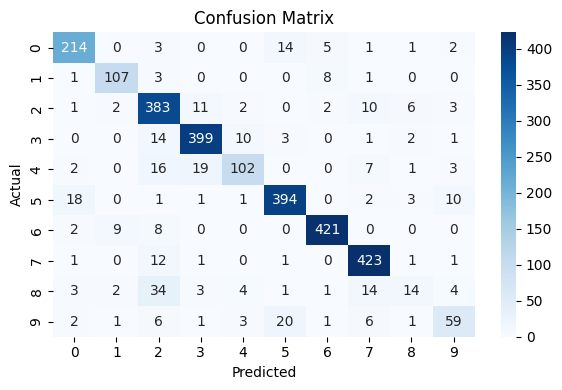

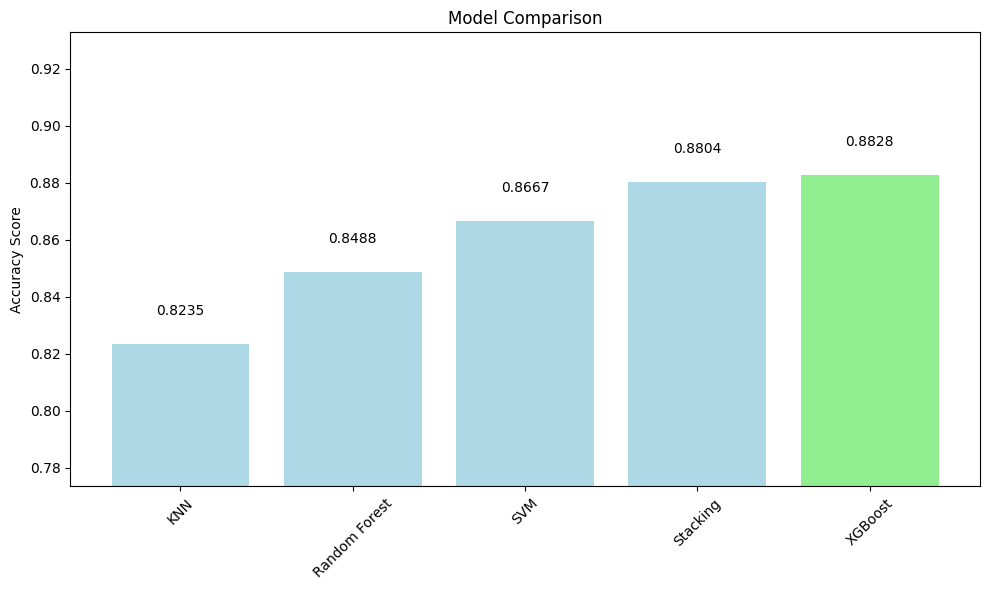

In [21]:
def evaluate_base_models():
    results = {}
    
    # Đánh giá SVM
    print("\n===== SVM Model Evaluation =====")
    svm_model = make_pipeline(StandardScaler(), SVC(**best_params_svm))
    svm_model.fit(X_train, y_train)
    y_svm_pred = svm_model.predict(X_test)
    display_result(y_test, y_svm_pred, svm_model)
    svm_acc = accuracy_score(y_test, y_svm_pred)
    results['SVM'] = svm_acc
    
    # Đánh giá Random Forest
    print("\n===== Random Forest Model Evaluation =====")
    rf_model = RandomForestClassifier(**best_params_rf, random_state=42)
    rf_model.fit(X_train, y_train)
    y_rf_pred = rf_model.predict(X_test)
    display_result(y_test, y_rf_pred, rf_model)
    rf_acc = accuracy_score(y_test, y_rf_pred)
    results['Random Forest'] = rf_acc
    
    # Đánh giá KNN
    print("\n===== KNN Model Evaluation =====")
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_knn_pred = knn_model.predict(X_test)
    display_result(y_test, y_knn_pred, knn_model)
    knn_acc = accuracy_score(y_test, y_knn_pred)
    results['KNN'] = knn_acc
    
    # Đánh giá XGBoost
    print("\n===== XGBoost Model Evaluation =====")
    xgb_model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **best_params_xgb 
    )
    xgb_model.fit(X_train, y_train)
    y_xgb_pred = xgb_model.predict(X_test)
    display_result(y_test, y_xgb_pred, xgb_model)
    xgb_acc = accuracy_score(y_test, y_xgb_pred)
    results['XGBoost'] = xgb_acc
    
    # Đánh giá Stacking Model (đã được đánh giá trước đó)
    stack_acc = accuracy_score(y_test, y_stack_pred)
    results['Stacking'] = stack_acc
    
    return results

# Thực hiện đánh giá
model_results = evaluate_base_models()

# %% [code]
# Visualize kết quả so sánh
plt.figure(figsize=(10, 6))
models = list(model_results.keys())
accuracies = list(model_results.values())

# Sắp xếp kết quả theo độ chính xác
sorted_indices = np.argsort(accuracies)
models = [models[i] for i in sorted_indices]
accuracies = [accuracies[i] for i in sorted_indices]

bar_colors = ['lightblue' for _ in range(len(models))]
bar_colors[-1] = 'lightgreen'  # Highlight stacking model

plt.bar(models, accuracies, color=bar_colors)
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)
plt.xticks(rotation=45)

# Add values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.show()